In [1]:
%load_ext autoreload
%autoreload 2

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

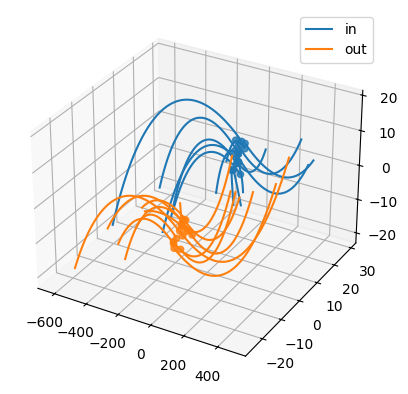

In [2]:
from dynadojo.systems.lds import LDSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

latent_dim = 9
embed_dim = 14
n = 500
timesteps = 50
system = SystemChecker(LDSystem(latent_dim, embed_dim, noise_scale=0, seed=0))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

[abstractions.py:513 -             evaluate() ] Running systems in parallel. num_parallel_cpu=-1
/home/victorvh/dynadojo/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.350583825504817e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/home/victorvh/dynadojo/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 109517.87860545325. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/home/victorvh/dynadojo/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.4517903377832616e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/home/victorvh/dynadojo/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 1041528.9949797485. Con

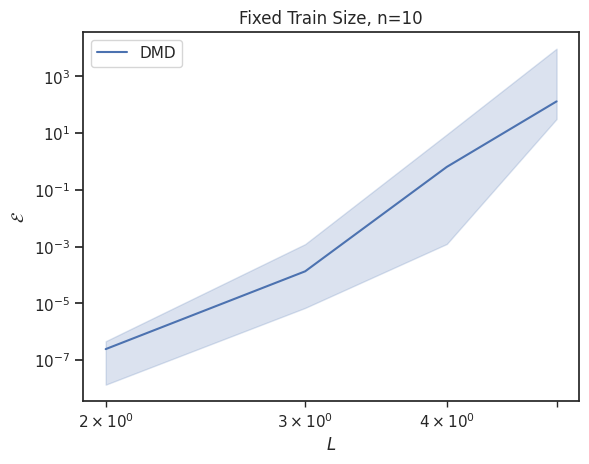

<Axes: title={'center': 'Fixed Train Size, n=10'}, xlabel='$L$', ylabel='$\\mathcal{E}$'>

In [3]:
from dynadojo.baselines.dmd import DMD
from dynadojo.challenges import FixedTrainSize

challenge = FixedTrainSize(L=[2, 3, 4, 5], E=None, t=50, n=10, trials=10, system_cls=LDSystem, test_examples=1, test_timesteps=50, max_control_cost_per_dim=0, control_horizons=0)
data = challenge.evaluate(algo_cls=DMD)
challenge.plot(data)